In [1]:
#Data Structures
import pandas as pd
import numpy as np
import re
import os

### For installing missingno library, type this command in terminal
#pip install missingno

#import missingno as msno

#Sklearn
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, precision_score, recall_score

#Plotting
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

#Others
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
data = pd.read_csv("train.csv")
unseen = pd.read_csv("test.csv")
sample = pd.read_csv("sample.csv")
data_dict = pd.read_csv("data_dictionary.csv")

print(data.shape)
print(unseen.shape)
print(sample.shape)
print(data_dict.shape)

(69999, 172)
(30000, 171)
(30000, 2)
(36, 2)


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Columns: 172 entries, id to churn_probability
dtypes: float64(135), int64(28), object(9)
memory usage: 91.9+ MB


In [4]:
#Churn rate is 10.19 %
churn = (sum(data['churn_probability'])/len(data['churn_probability'].index))*100
print(churn)

10.188716981671167


In [5]:
data.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,...,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,...,0,0,NaN,NaN,NaN,1958,0.0,0.0,0.0,0
1,1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,...,0,0,NaN,1.0,NaN,710,0.0,0.0,0.0,0
2,2,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,60.806,103.176,...,0,0,NaN,NaN,NaN,882,0.0,0.0,0.0,0
3,3,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,156.362,205.260,...,0,0,NaN,NaN,NaN,982,0.0,0.0,0.0,0
4,4,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,240.708,128.191,...,1,0,1.0,1.0,1.0,647,0.0,0.0,0.0,0


In [6]:
data.pop('id')
y_dataset = data.pop('churn_probability')
X_dataset = data

#Create train & test split dataset
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, test_size=0.3)

print(X_train.shape)
print(X_test.shape)
print(y_train.head())


(48999, 170)
(21000, 170)
19292    0
15773    0
68000    0
28340    0
4008     1
Name: churn_probability, dtype: int64


In [7]:
data_dict

,Acronyms,Description
0,CIRCLE_ID,Telecom circle area to which the customer belo...
1,LOC,Local calls within same telecom circle
2,STD,STD calls outside the calling circle
3,IC,Incoming calls
4,OG,Outgoing calls
5,T2T,Operator T to T ie within same operator mobile...
6,T2M,Operator T to other operator mobile
7,T2O,Operator T to other operator fixed line
8,T2F,Operator T to fixed lines of T
9,T2C,Operator T to its own call center


In [8]:
# Copy the X_unseen dataset & used in later for excercise
X_unseen = unseen.copy()
X_unseen.pop('id')

0        69999
1        70000
2        70001
3        70002
4        70003
         ...  
29995    99994
29996    99995
29997    99996
29998    99997
29999    99998
Name: id, Length: 30000, dtype: int64

In [9]:
y_train.head()

19292    0
15773    0
68000    0
28340    0
4008     1
Name: churn_probability, dtype: int64

In [10]:
X_train.isna().any()[lambda x: x]

loc_og_t2o_mou          True
std_og_t2o_mou          True
loc_ic_t2o_mou          True
last_date_of_month_7    True
last_date_of_month_8    True
                        ... 
night_pck_user_7        True
night_pck_user_8        True
fb_user_6               True
fb_user_7               True
fb_user_8               True
Length: 125, dtype: bool

# Data cleaning & Preparation

In [11]:
# Remove the column which have more than 40% of missing values

missing_data_percent = 100*X_train.isnull().sum()/len(y_train)
columnCount = len(y_train)
missing_data_percent

col_to_drop = missing_data_percent[missing_data_percent.ge(40)].index
X_train = X_train.drop(col_to_drop,axis=1)
X_test = X_test.drop(col_to_drop,axis=1)

In [12]:
print(X_train.shape)
y_train.shape

(48999, 140)


(48999,)

In [13]:
# Identify the columns with Null values
columnWithNA = X_train.isna().any()[lambda x: x]
columnWithNA

loc_og_t2o_mou          True
std_og_t2o_mou          True
loc_ic_t2o_mou          True
last_date_of_month_7    True
last_date_of_month_8    True
                        ... 
ic_others_7             True
ic_others_8             True
date_of_last_rech_6     True
date_of_last_rech_7     True
date_of_last_rech_8     True
Length: 95, dtype: bool

In [14]:
#Convert date to actual 'day of month' & replace null values with '0'
col_withDate = ['last_date_of_month_6','last_date_of_month_7','last_date_of_month_8','date_of_last_rech_6','date_of_last_rech_7',
              'date_of_last_rech_8']
for col in col_withDate:
    X_train[col] = pd.to_datetime(X_train[col])
    X_train[col] = X_train[col].dt.day
    X_test[col] = pd.to_datetime(X_test[col])
    X_test[col] = X_test[col].dt.day
    X_unseen[col] = pd.to_datetime(X_unseen[col])
    X_unseen[col] = X_unseen[col].dt.day
    
    
for col in col_withDate:
    X_train[col] = X_train[col].apply(lambda x:str(x).replace('nan','0'))
    X_test[col] = X_test[col].apply(lambda x:str(x).replace('nan','0'))
    X_unseen[col] = X_unseen[col].apply(lambda x:str(x).replace('nan','0'))

In [15]:
columnWithNA = X_train.isna().any()[lambda x: x]

In [16]:
#Impute all the null values with '0'
columnsWithNA = columnWithNA.index

for col in columnsWithNA:
    X_train[col] = X_train[col].apply(lambda x:str(x).replace('nan','0'))
    X_test[col] = X_test[col].apply(lambda x:str(x).replace('nan','0'))
    X_unseen[col] = X_unseen[col].apply(lambda x:str(x).replace('nan','0'))

In [17]:
X_train.last_date_of_month_6.value_counts()

30    48999
Name: last_date_of_month_6, dtype: int64

In [18]:
columnWithNA = X_train.isna().any()[lambda x: x]
columnWithNA

Series([], dtype: bool)

In [19]:
columnWithNA = X_train.isna().any()[lambda x: x]
columnWithNA

Series([], dtype: bool)

# EDA 

In [20]:
# SInce we have large number of columns, splitting columns into 4 subset to view the dataset over boxplot
allCol = X_train.columns
colList1 = allCol[0:35]
colList2 = allCol[36:70]
colList3 = allCol[71:105]
colList4 = allCol[106:]

In [21]:
X_train = X_train.astype(float)
X_test = X_test.astype(float)

colGroup = [colList1,colList2,colList3,colList4]
len(X_train.columns)

colList1

Index(['circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou',
       'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
       'arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7',
       'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8',
       'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_og_mou_6',
       'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_6',
       'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6',
       'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_6',
       'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_6',
       'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_mou_6'],
      dtype='object')

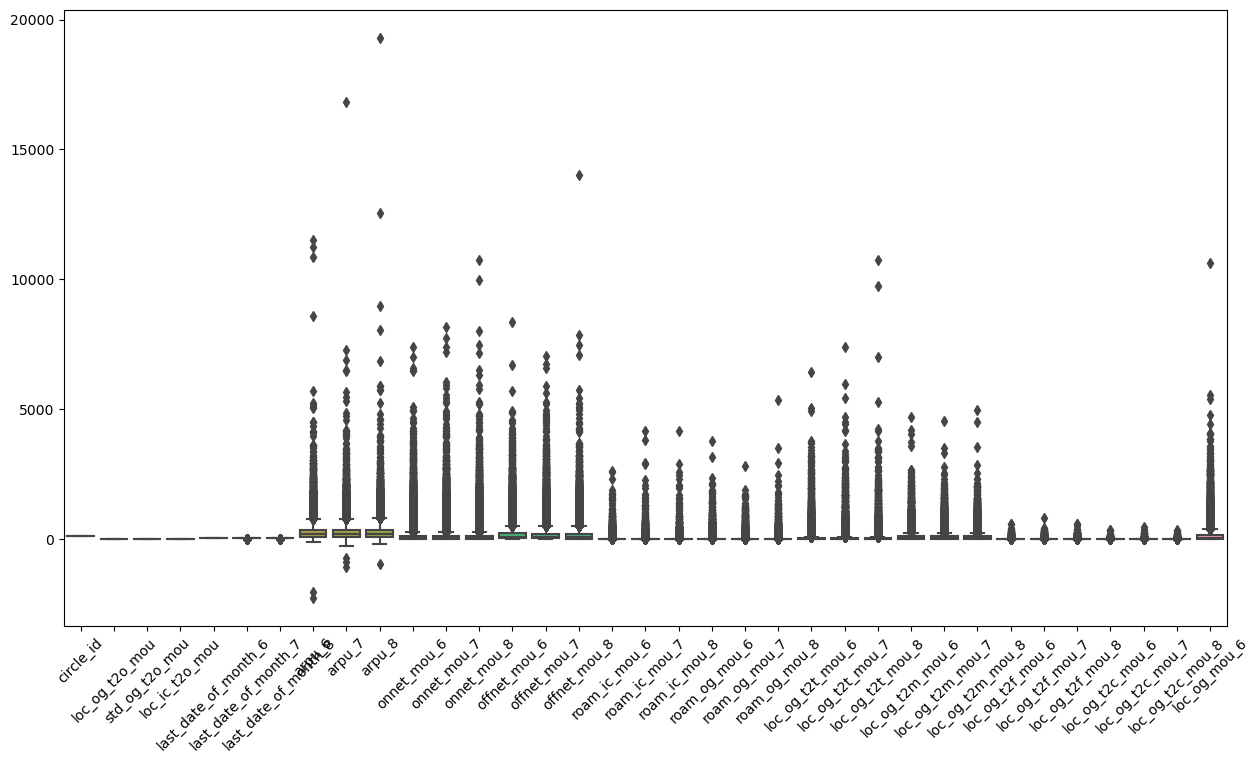

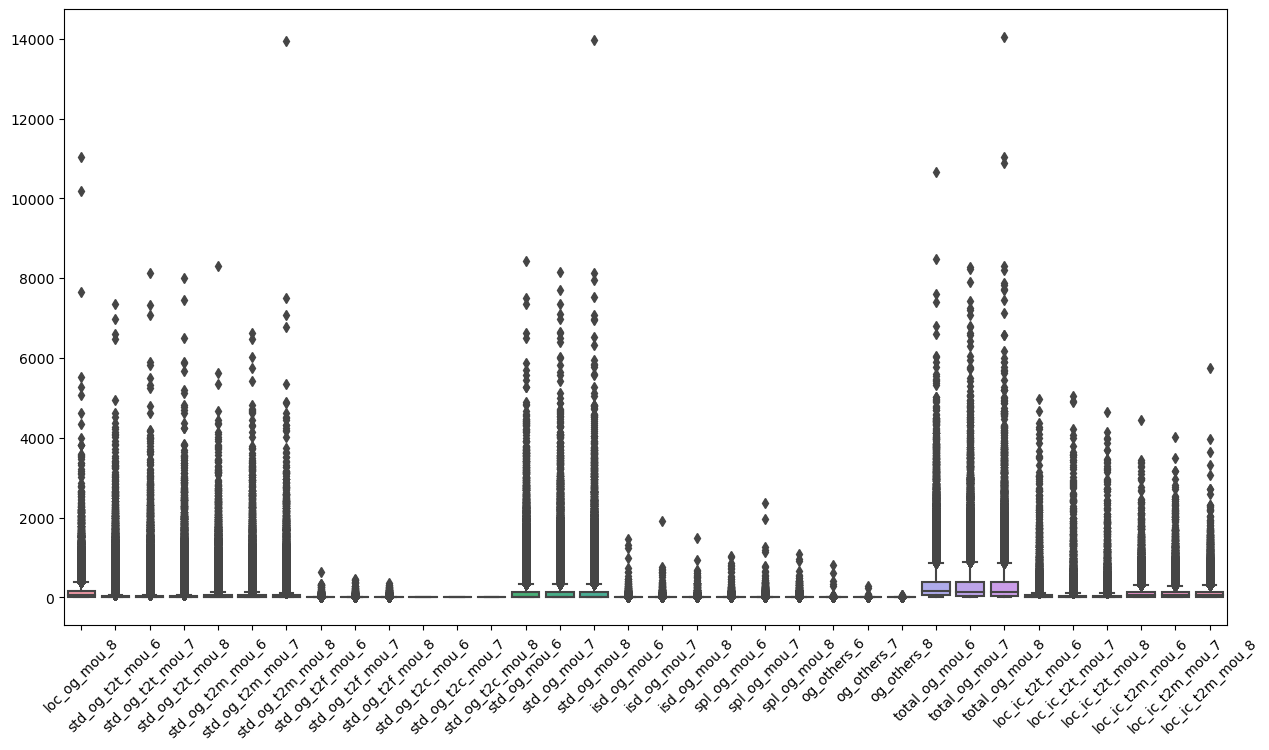

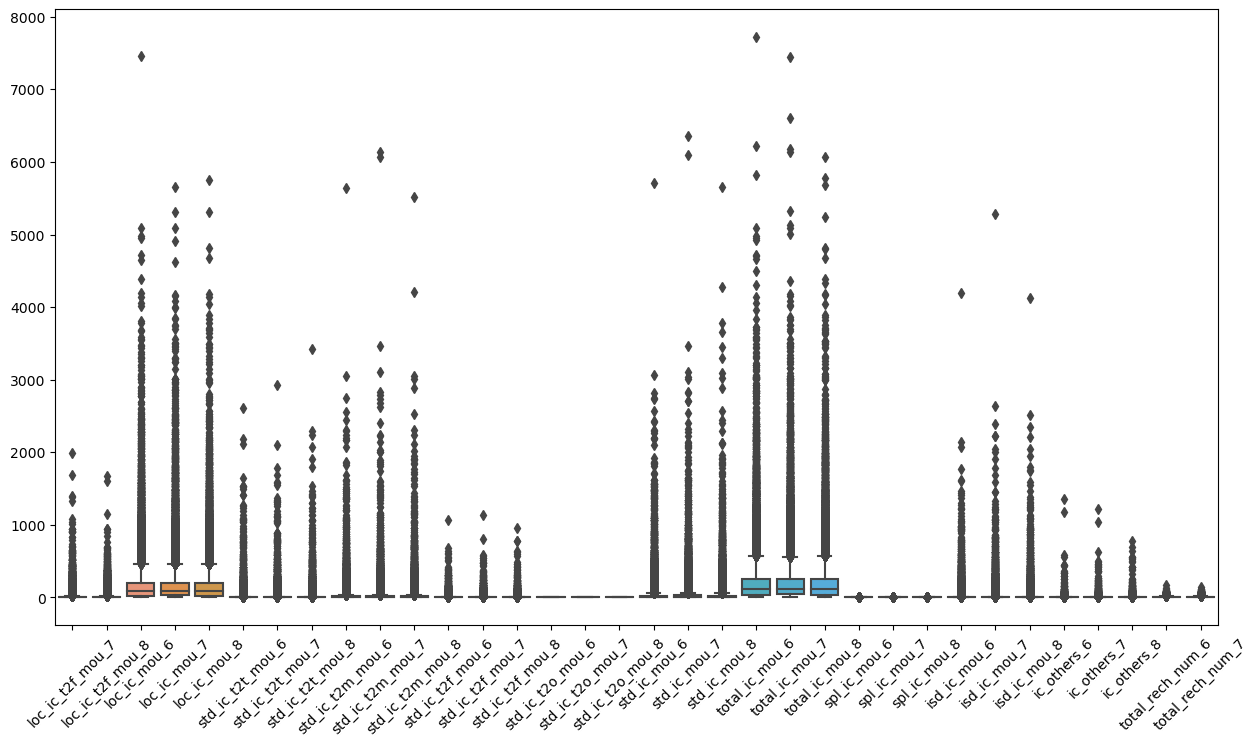

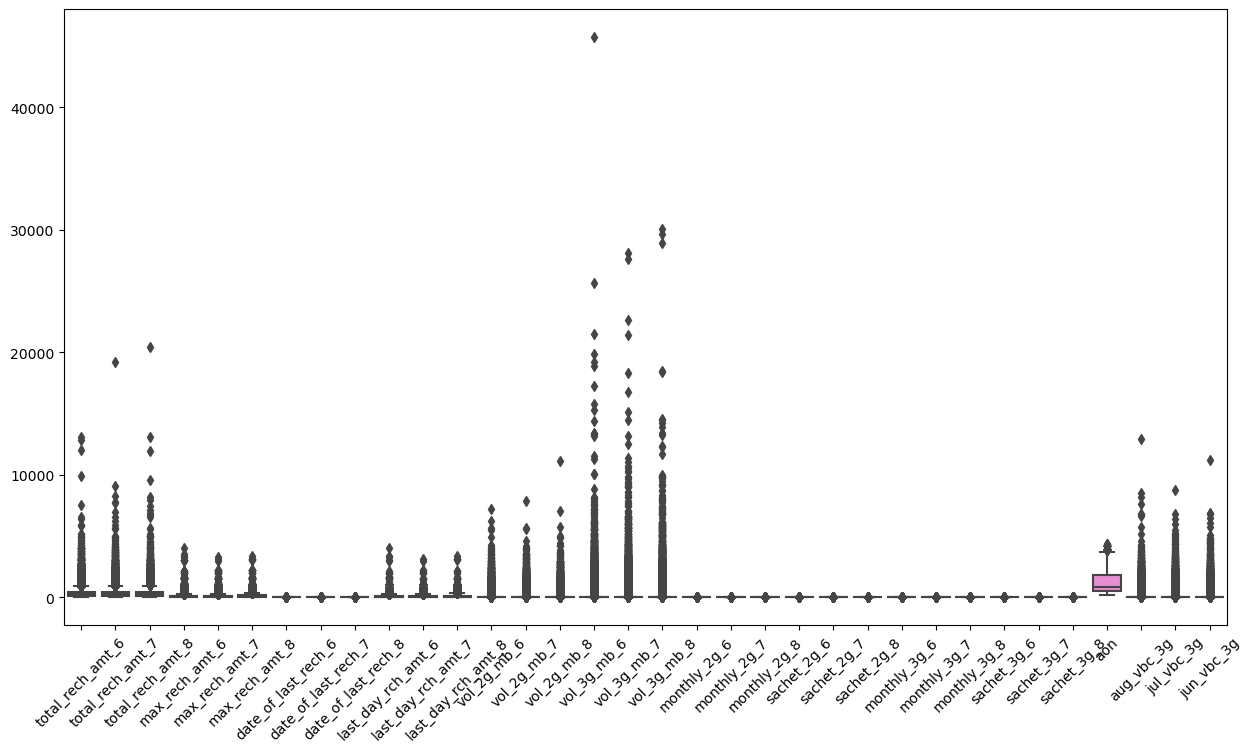

In [22]:
for cols in colGroup:
    plt.figure(figsize=(15,8))
    plt.xticks(rotation=45)
    sns.boxplot(data = X_train[cols])

In [23]:
## Below code will fit the outliers

def cap_outliers(array, k=3):
    upper_limit = array.mean() + k*array.std()
    lower_limit = array.mean() - k*array.std()
    array[array<lower_limit] = lower_limit
    array[array>upper_limit] = upper_limit
    return array

In [24]:
X_train = X_train.astype(float)
X_test = X_test.astype(float)

X_train = X_train.apply(cap_outliers, axis=0)
X_test = X_test.apply(cap_outliers, axis=0)


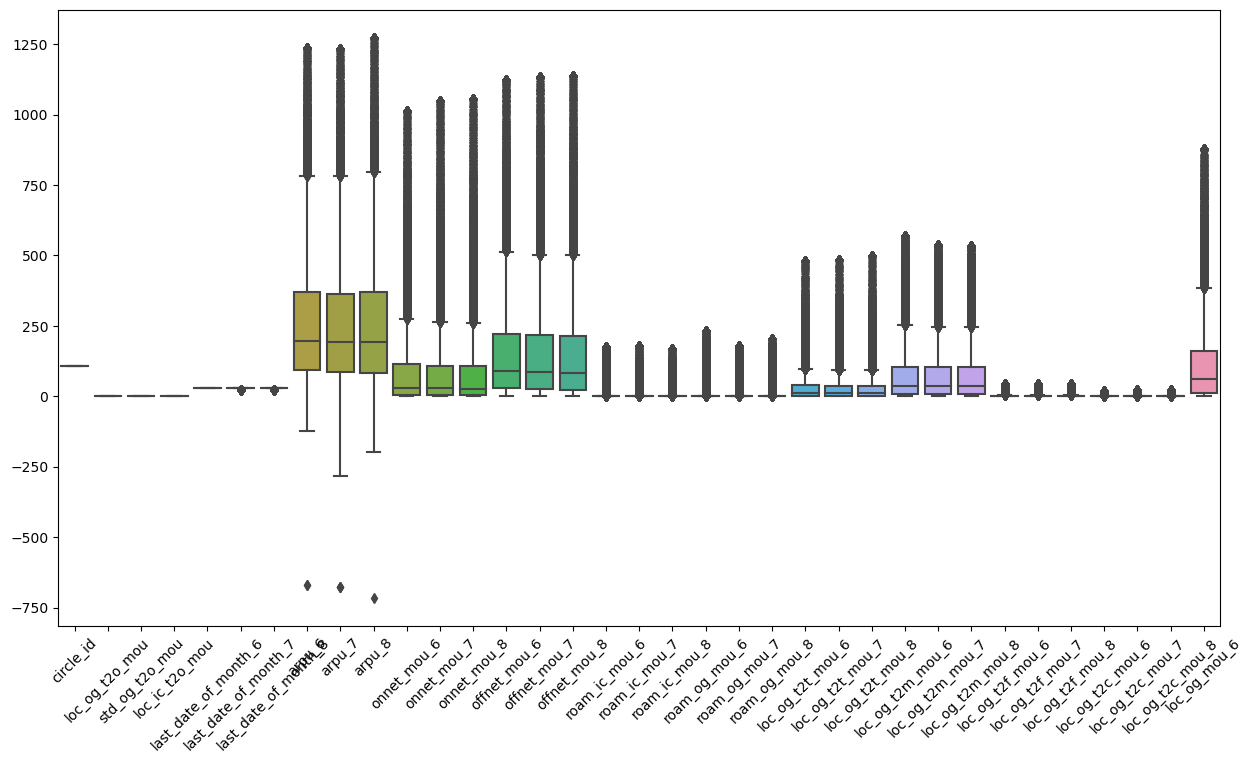

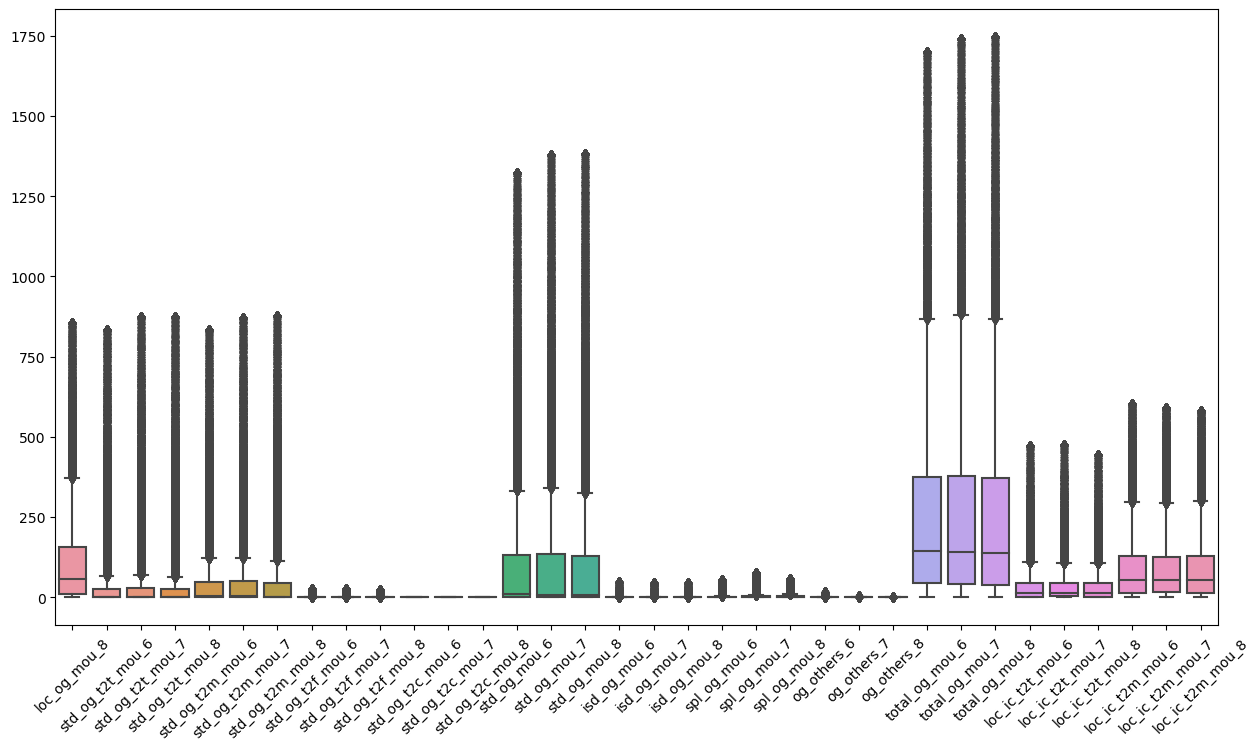

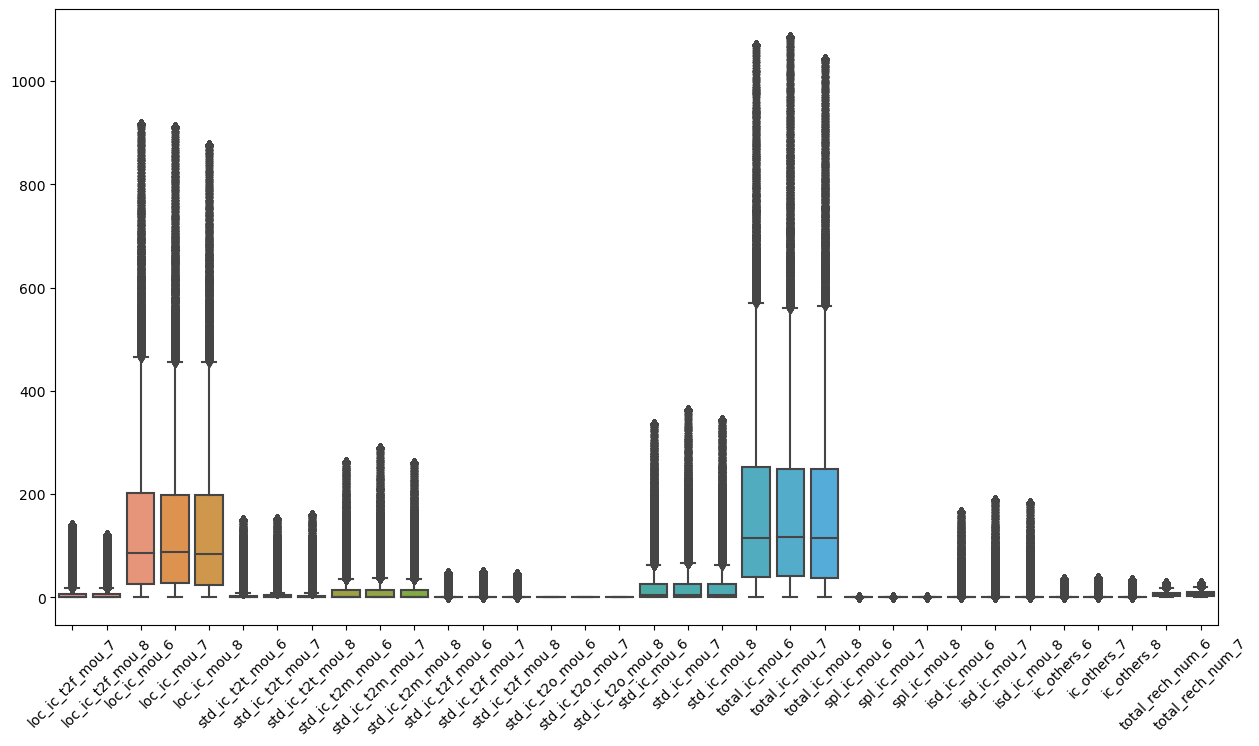

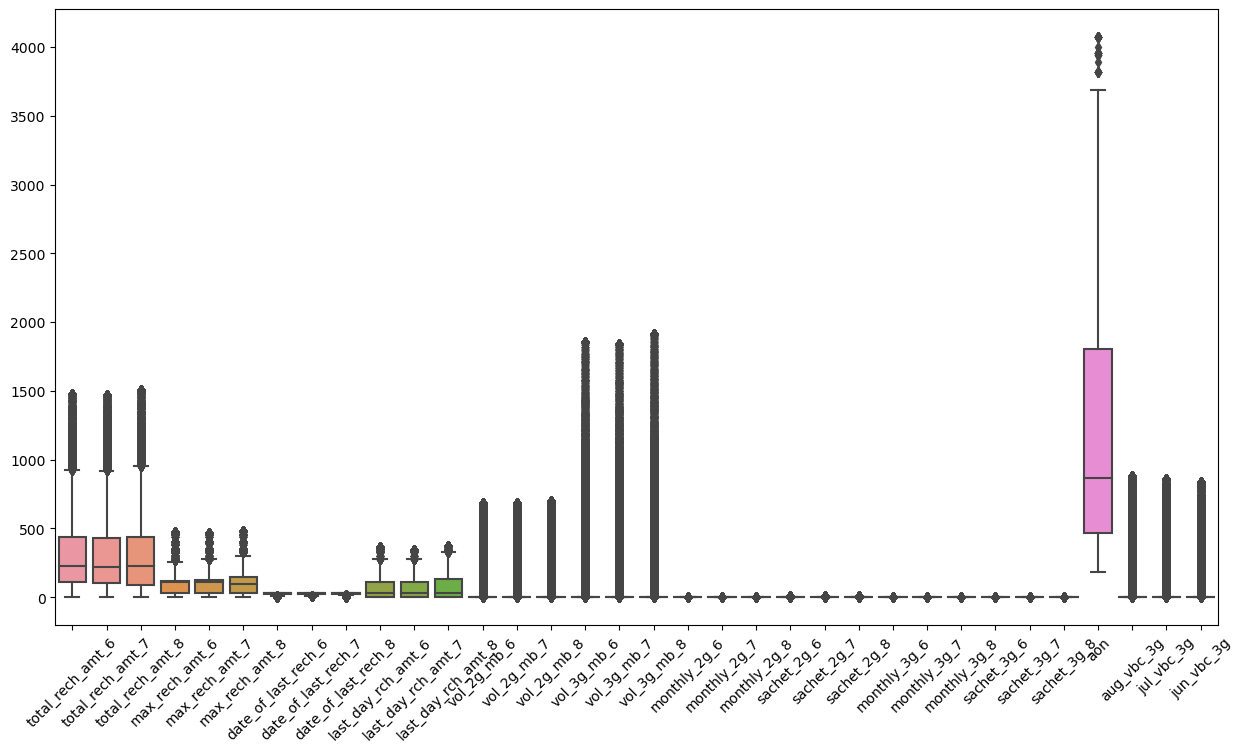

In [25]:
for cols in colGroup:
    plt.figure(figsize=(15,8))
    plt.xticks(rotation=45)
    sns.boxplot(data = X_train[cols])

In [26]:
# find out the correlation

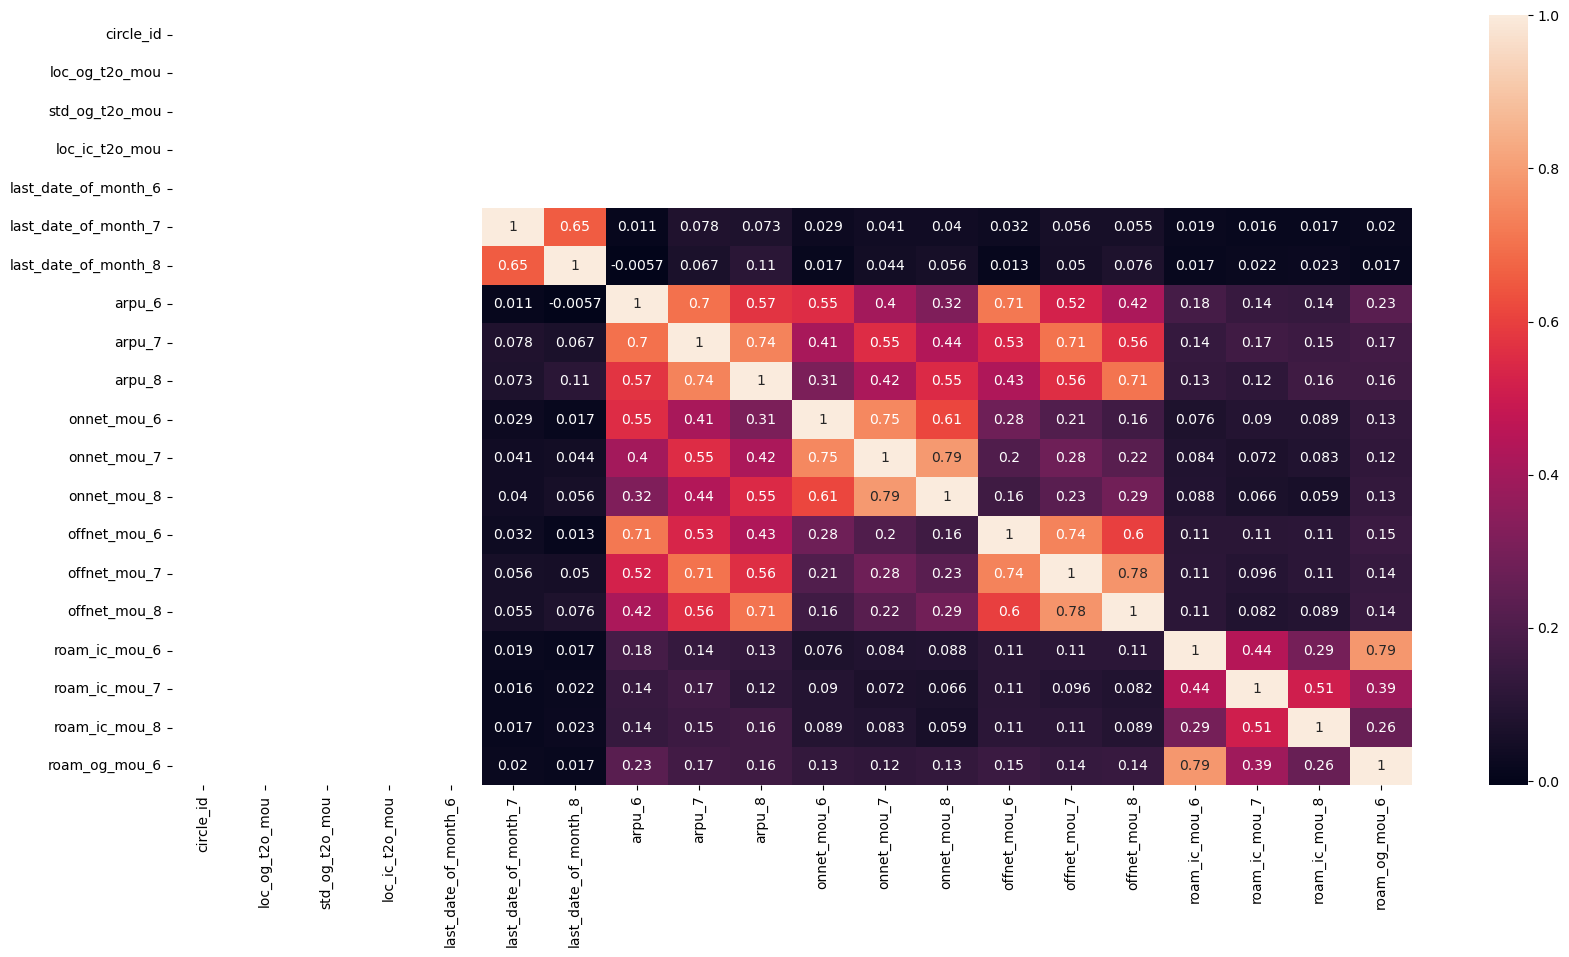

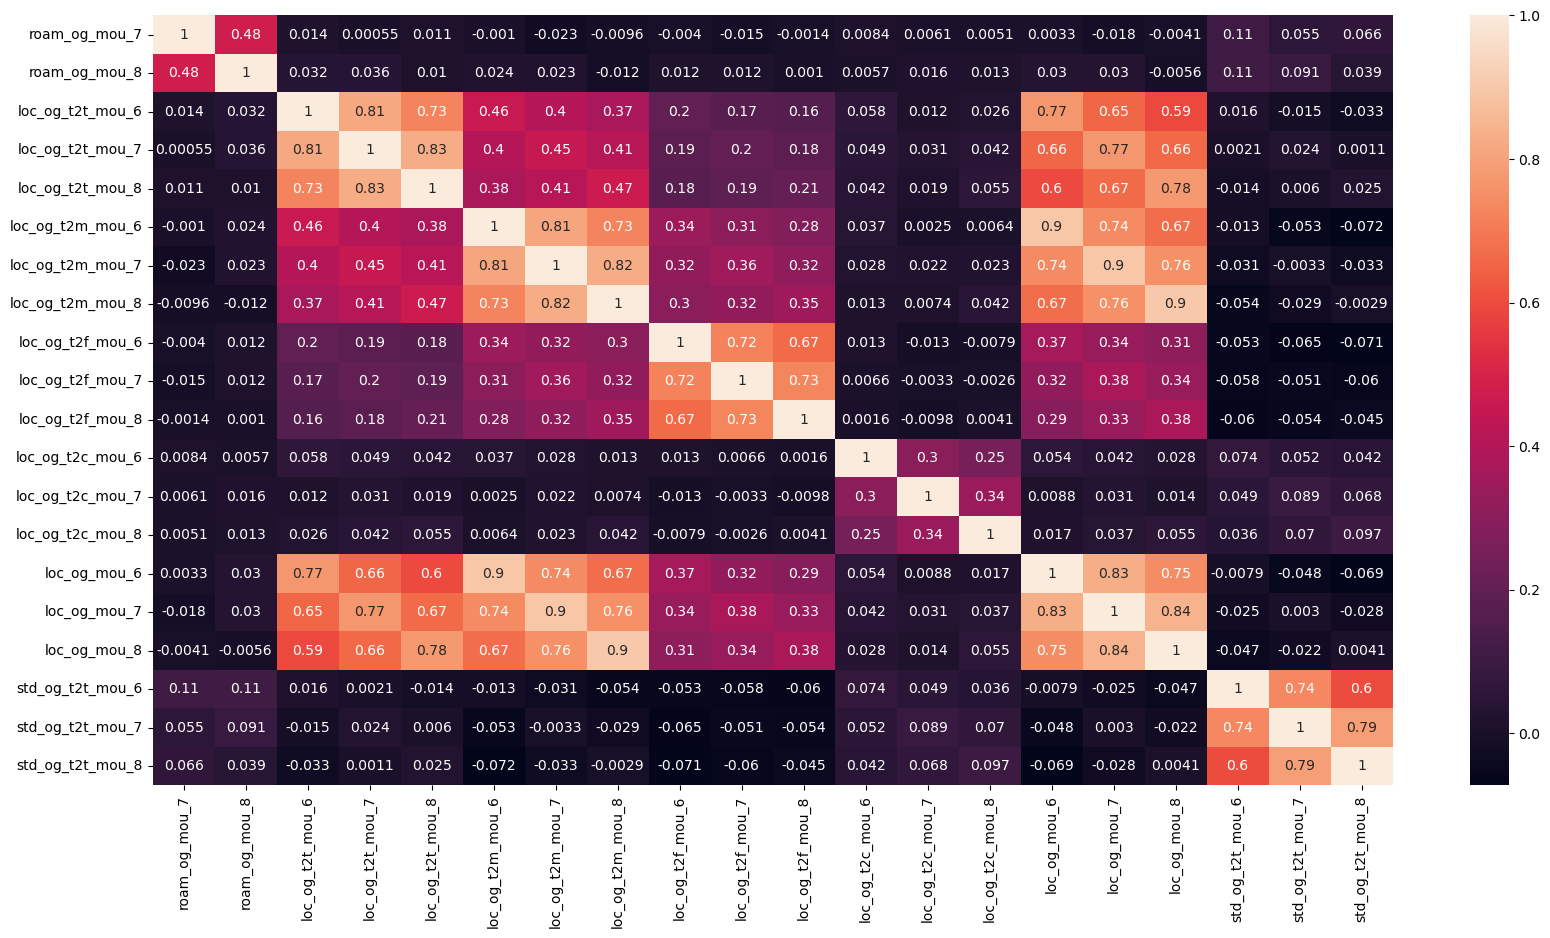

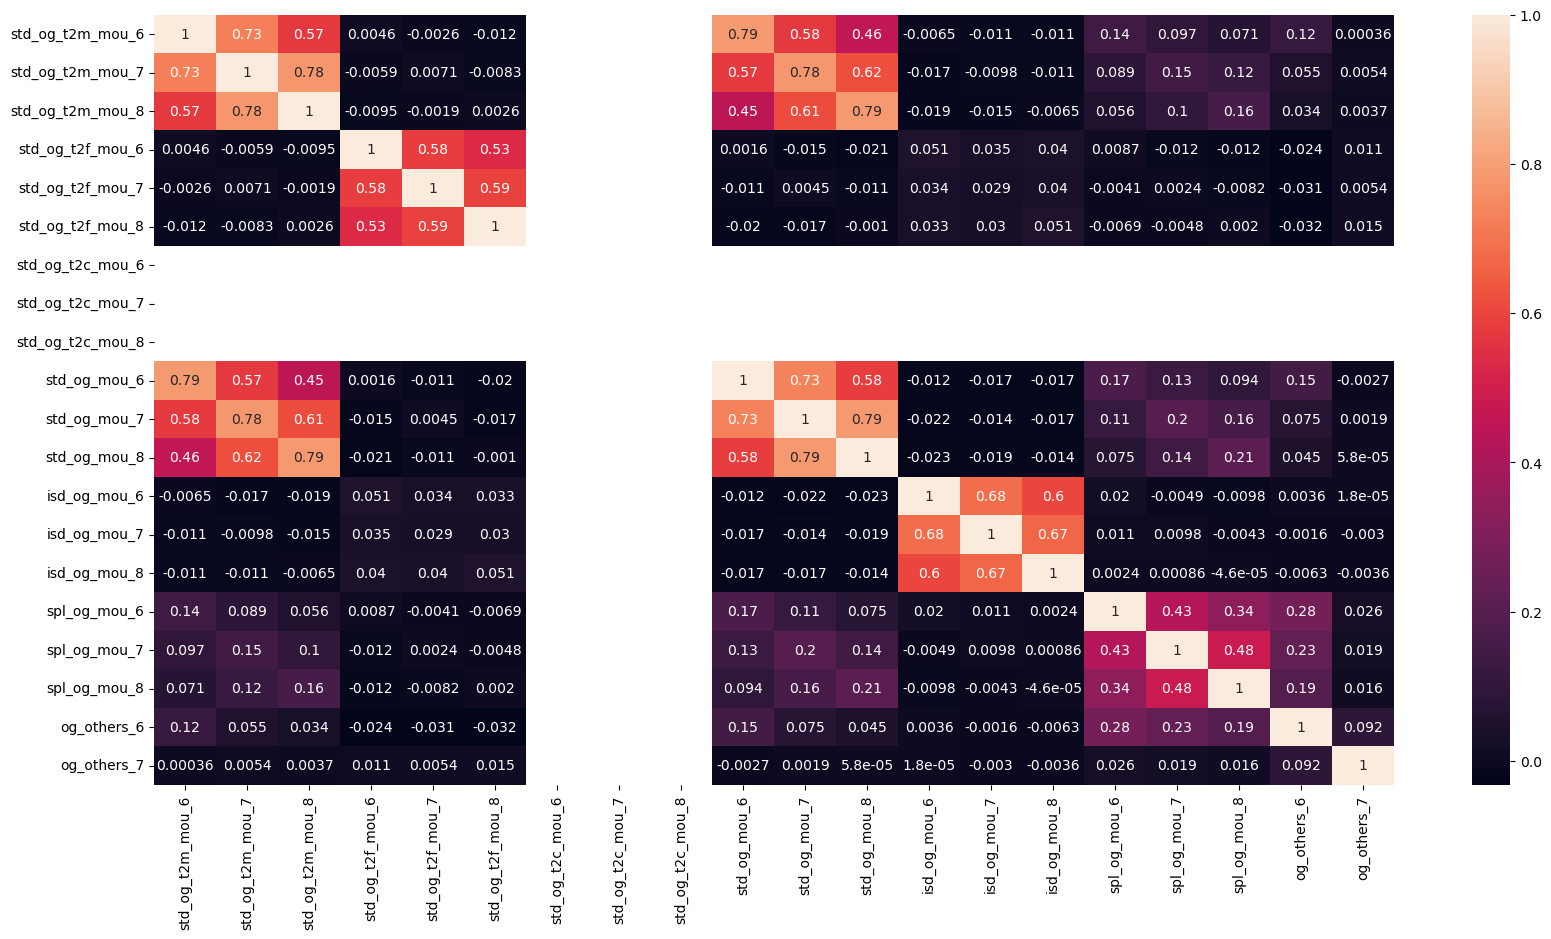

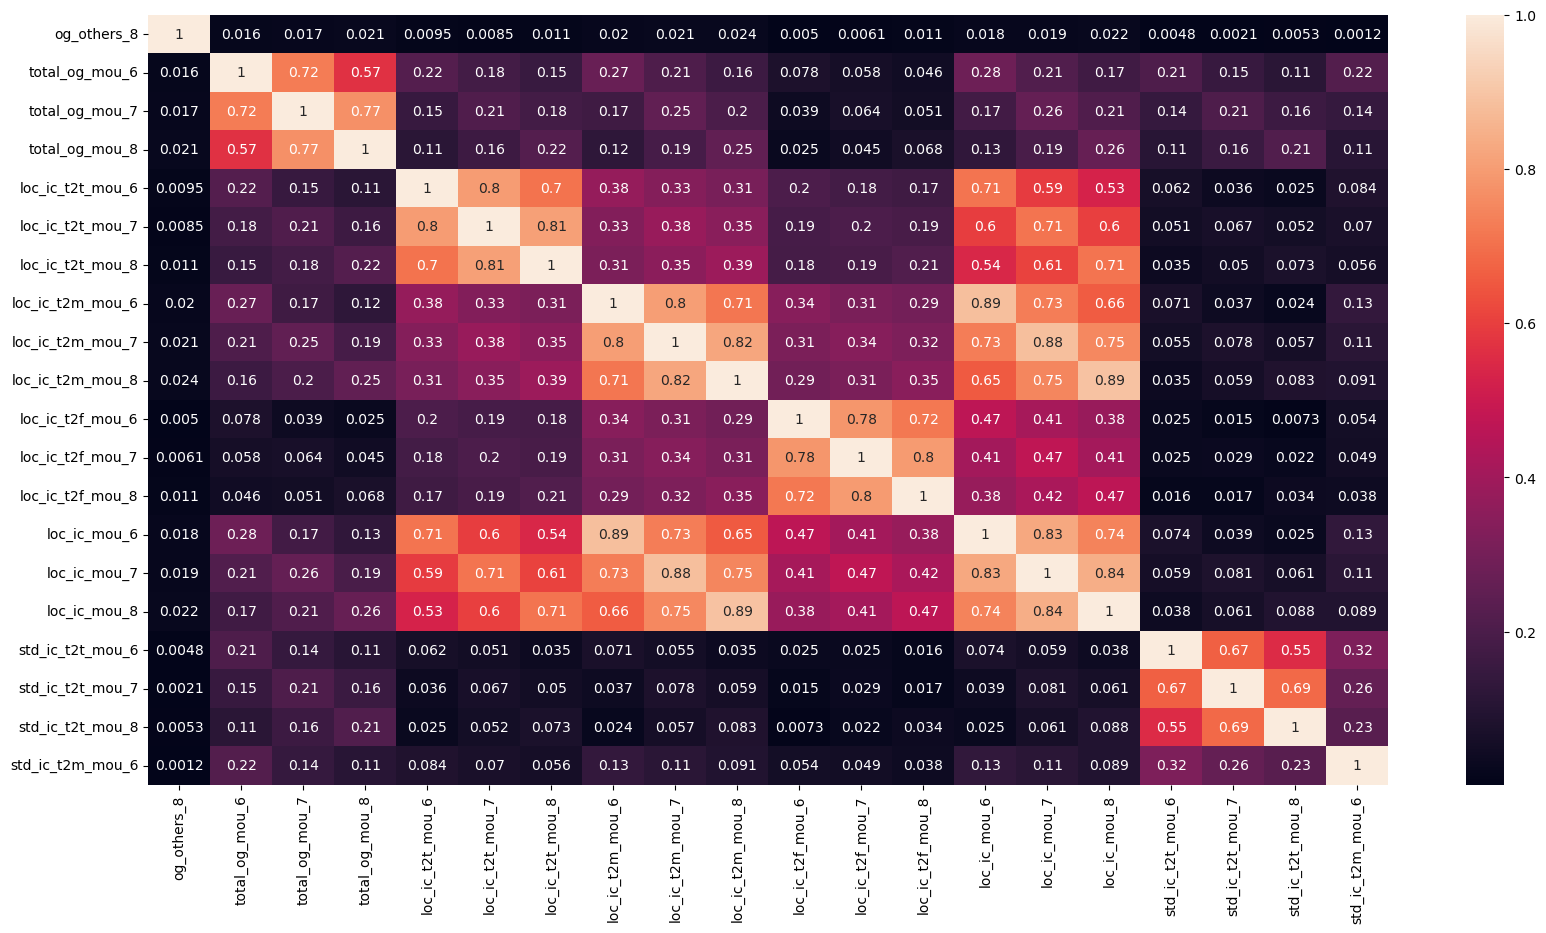

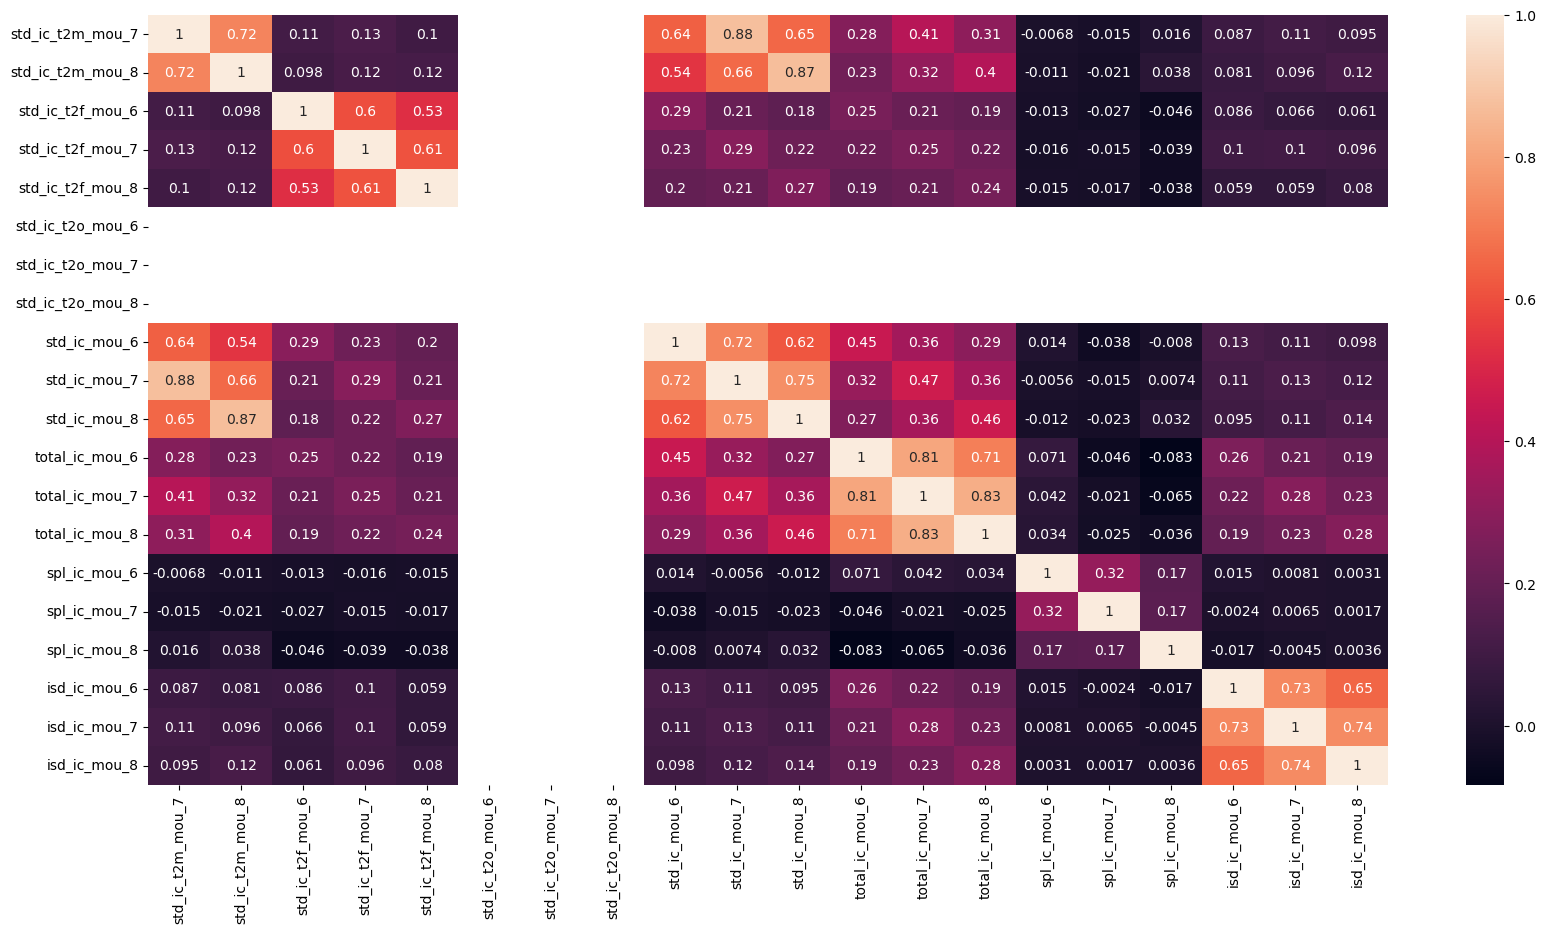

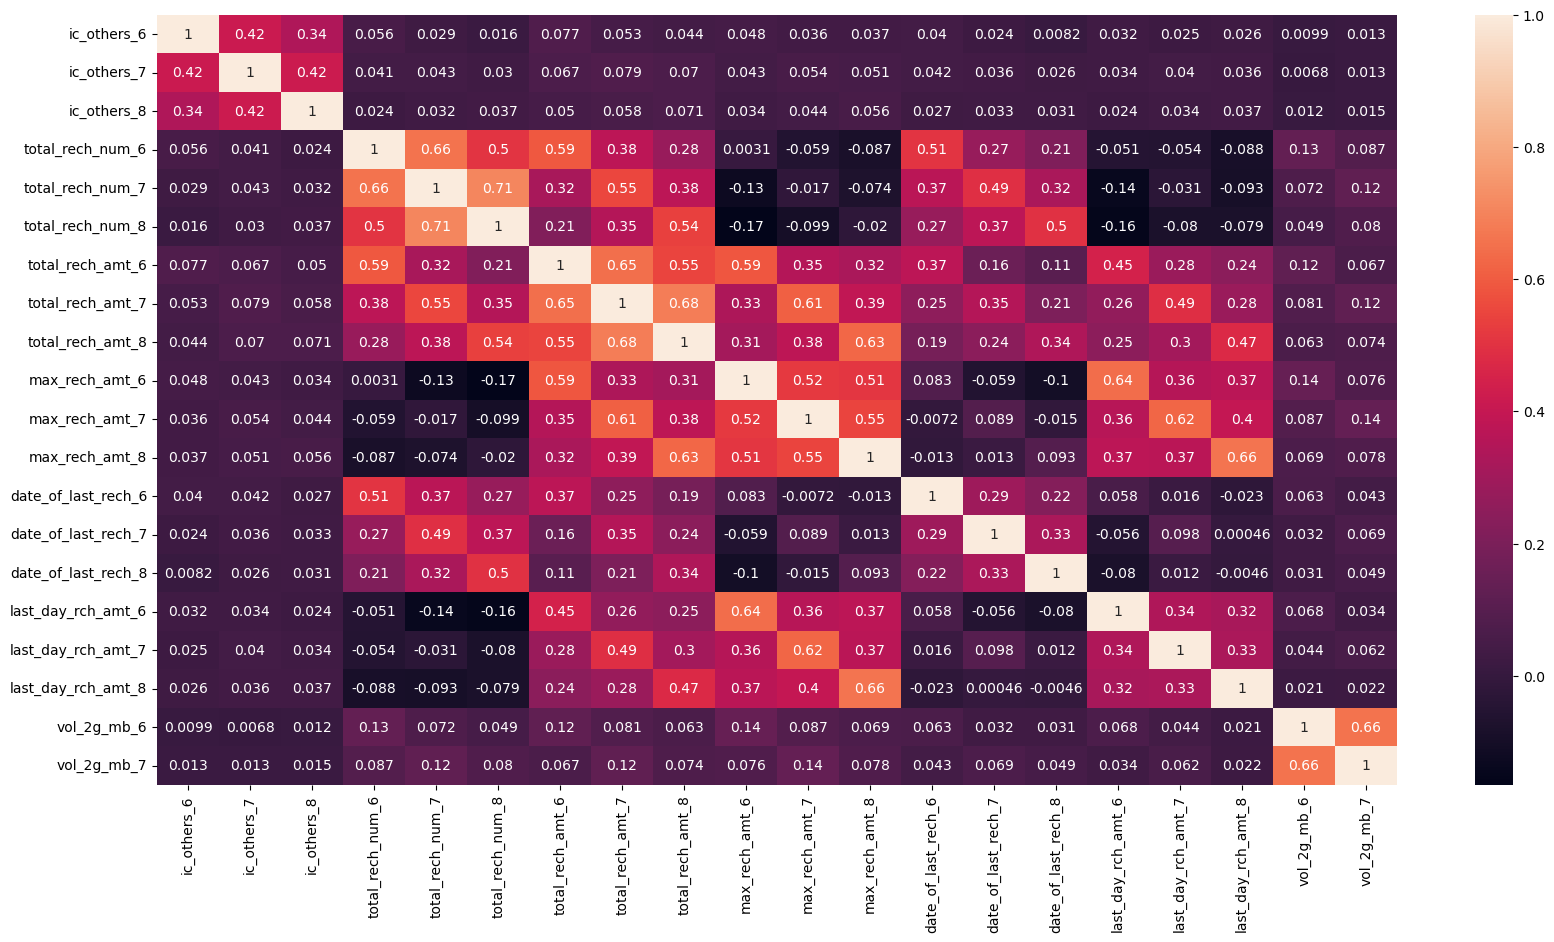

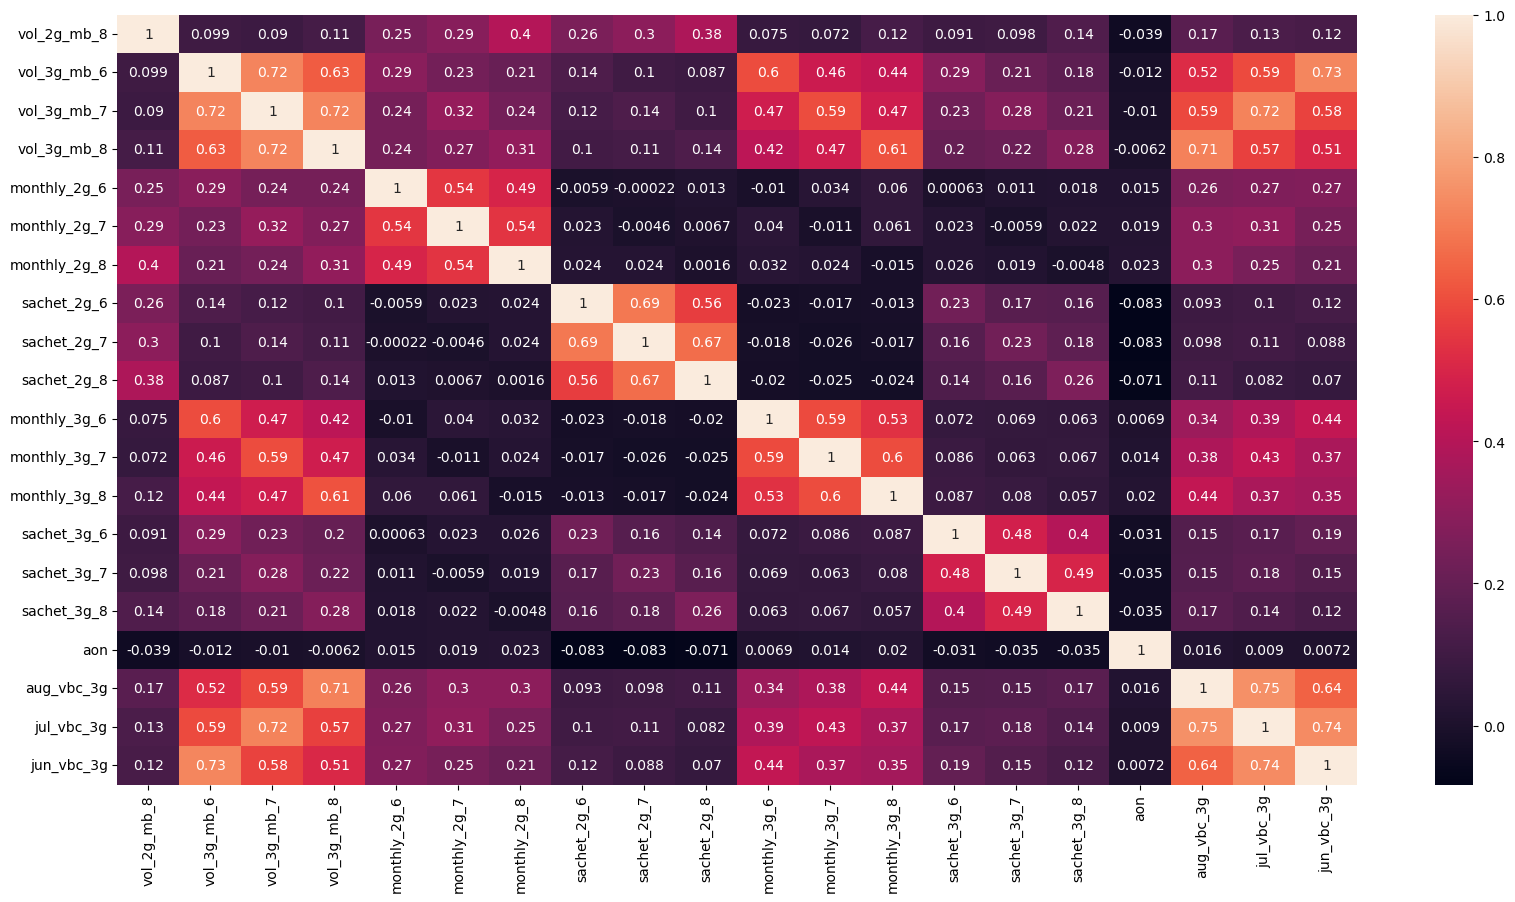

In [27]:
for i in range(int(len(X_train.columns)/20)):
    plt.figure(figsize = (20,10))
    j = i*20
    sns.heatmap(X_train[X_train.columns[j:j+20]].corr(),annot = True)
    
#based on below correation maps we can drop below columns
#loc_og_t2e_mou
#std_og_t20_mou
# & so on
# Lot of columns have correation above 0.7 & dont know importance of columns.
# PCA will handle when data has high correaltion & we are not sure which one to remove from the dataset

In [28]:


X_train_dt = X_train.copy()
y_train_dt = y_train.copy()
X_test_dt = X_test.copy()
y_test_dt = y_test.copy()

## Scaling the dataset

In [29]:
scaler = StandardScaler()
X__train = scaler.fit_transform(X_train)
X__test = scaler.fit_transform(X_test)



# Build PCA based model

In [30]:
pca = PCA(0.9)
X__train = pca.fit_transform(X__train)

In [31]:
model = LogisticRegression()
model = model.fit(X__train, y_train)

In [32]:
X__test = pca.transform(X__test)
y_test_df = pd.DataFrame(y_test)
y_test_df['churn_probability1'] = model.predict(X__test)


In [33]:
y_test_df.head()

,churn_probability,churn_probability1
15127,0,0
36606,0,0
60778,1,0
16003,0,0
34452,0,0


In [34]:
from sklearn import metrics
confusion = metrics.confusion_matrix(y_test_df.churn_probability, y_test_df.churn_probability1)
print(confusion)
metrics.accuracy_score(y_test_df.churn_probability, y_test_df.churn_probability1)

[[18578   267]
 [ 1494   661]]


0.9161428571428571

In [35]:
"{:2.2f}".format(metrics.roc_auc_score(y_test_df.churn_probability, y_test_df.churn_probability1))

'0.65'

In [36]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)

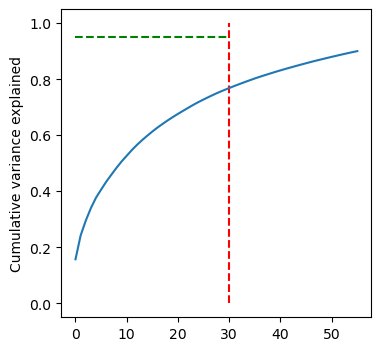

In [37]:
fig = plt.figure(figsize=[4,4])
plt.vlines(x=30, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=30, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

In [38]:
X__train = scaler.fit_transform(X_train)
X__test = scaler.fit_transform(X_test)# Build PCA2 based model

from sklearn.decomposition import IncrementalPCA
pca2 = pca = PCA(random_state=42)
X__train = pca2.fit_transform(X__train)

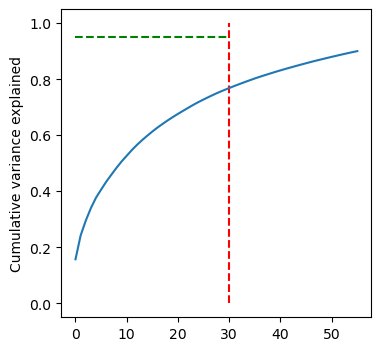

[1.57112173e-01 8.47505307e-02 5.30734061e-02 4.47822251e-02
 3.73142818e-02 2.90255352e-02 2.80818837e-02 2.50863284e-02
 2.44604413e-02 2.28339185e-02 2.04544576e-02 2.03081422e-02
 1.84534312e-02 1.69279931e-02 1.56220679e-02 1.51445319e-02
 1.41582098e-02 1.29854673e-02 1.26707138e-02 1.18492952e-02
 1.13689672e-02 1.08993019e-02 1.08117817e-02 1.05634190e-02
 9.96475718e-03 9.09917873e-03 8.97621705e-03 8.68438039e-03
 8.28727014e-03 7.57079345e-03 7.43839019e-03 7.22690029e-03
 6.94525303e-03 6.82252114e-03 6.66075053e-03 6.57733134e-03
 6.11389631e-03 5.79991317e-03 5.73822436e-03 5.70094831e-03
 5.48184634e-03 5.32984677e-03 5.13431549e-03 5.08863142e-03
 4.97531922e-03 4.95875312e-03 4.80800254e-03 4.62802263e-03
 4.51684152e-03 4.42514963e-03 4.37298144e-03 4.27464614e-03
 4.25926969e-03 4.13870140e-03 3.95653245e-03 3.86189850e-03
 3.68033474e-03 3.63012389e-03 3.56586717e-03 3.33194923e-03
 3.21751160e-03 3.17392173e-03 3.15628627e-03 3.09529471e-03
 2.79518932e-03 2.635128

array([1.57112173e-01, 8.47505307e-02, 5.30734061e-02, 4.47822251e-02,
       3.73142818e-02, 2.90255352e-02, 2.80818837e-02, 2.50863284e-02,
       2.44604413e-02, 2.28339185e-02, 2.04544576e-02, 2.03081422e-02,
       1.84534312e-02, 1.69279931e-02, 1.56220679e-02, 1.51445319e-02,
       1.41582098e-02, 1.29854673e-02, 1.26707138e-02, 1.18492952e-02,
       1.13689672e-02, 1.08993019e-02, 1.08117817e-02, 1.05634190e-02,
       9.96475718e-03, 9.09917873e-03, 8.97621705e-03, 8.68438039e-03,
       8.28727014e-03, 7.57079345e-03, 7.43839019e-03, 7.22690029e-03,
       6.94525303e-03, 6.82252114e-03, 6.66075053e-03, 6.57733134e-03,
       6.11389631e-03, 5.79991317e-03, 5.73822436e-03, 5.70094831e-03,
       5.48184634e-03, 5.32984677e-03, 5.13431549e-03, 5.08863142e-03,
       4.97531922e-03, 4.95875312e-03, 4.80800254e-03, 4.62802263e-03,
       4.51684152e-03, 4.42514963e-03, 4.37298144e-03, 4.27464614e-03,
       4.25926969e-03, 4.13870140e-03, 3.95653245e-03, 3.86189850e-03,
      

In [39]:
model = LogisticRegression()
model = model.fit(X__train, y_train)
X__test = pca2.transform(X__test)
y_test_df['churn_probability2'] = model.predict(X__test)
fig = plt.figure(figsize=[4,4])
plt.vlines(x=30, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=30, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

print(pca.explained_variance_ratio_)
pca2.explained_variance_ratio_

In [40]:
from sklearn import metrics
confusion = metrics.confusion_matrix(y_test_df.churn_probability, y_test_df.churn_probability2)
metrics.accuracy_score(y_test_df.churn_probability, y_test_df.churn_probability2)

0.9171428571428571

In [41]:
confusion

array([[18556,   289],
       [ 1451,   704]], dtype=int64)

#  Decision Tree : Logical Regression

In [42]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [43]:

X_train = X_train_dt.copy()
y_train = y_train_dt.copy()
X_test = X_test_dt.copy()
y_test = y_test_dt.copy()

X_train = X_train.astype(float)
X_train.head()

,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,...,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
19292,109.0,0.0,0.0,0.0,30.0,31.0,31.0,143.423,100.556,170.460,...,0.0,0.0,0.0,0.0,0.0,0.0,461.0,0.0,0.0,0.0
15773,109.0,0.0,0.0,0.0,30.0,31.0,31.0,76.523,45.074,43.693,...,0.0,0.0,0.0,0.0,0.0,0.0,2600.0,0.0,0.0,0.0
68000,109.0,0.0,0.0,0.0,30.0,31.0,31.0,32.380,34.988,52.680,...,0.0,0.0,0.0,0.0,0.0,0.0,1253.0,0.0,0.0,0.0
28340,109.0,0.0,0.0,0.0,30.0,31.0,31.0,141.641,170.203,274.242,...,0.0,0.0,0.0,0.0,0.0,0.0,611.0,0.0,0.0,0.0
4008,109.0,0.0,0.0,0.0,30.0,31.0,31.0,64.785,71.509,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,2943.0,0.0,0.0,0.0


In [44]:
print(y_train.head())

19292    0
15773    0
68000    0
28340    0
4008     1
Name: churn_probability, dtype: int64


In [45]:
# Create the parameter grid based on the results of random search 
params = {
    'max_depth': [3, 5, 8, 10, 20],
    'min_samples_leaf': [5, 10, 20,30,50,100],
    'criterion': ["gini", "entropy"]
}
dt = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(estimator=dt, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

In [46]:
%%time
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 60 candidates, totalling 240 fits
CPU times: total: 2.28 s
Wall time: 4min 31s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 8, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 30, 50, 100]},
             scoring='accuracy', verbose=1)

In [47]:
dt_best = grid_search.best_estimator_
dt_best

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=20,
                       random_state=42)

In [48]:
from sklearn.metrics import confusion_matrix, accuracy_score
def evaluate_model(dt_classifier):
    print("Train Accuracy :", accuracy_score(y_train, dt_classifier.predict(X_train)))
    print("Train Confusion Matrix:")
    print(confusion_matrix(y_train, dt_classifier.predict(X_train)))
    print("-"*50)
    print("Test Accuracy :", accuracy_score(y_test, dt_classifier.predict(X_test)))
    print("Test Confusion Matrix:")
    print(confusion_matrix(y_test, dt_classifier.predict(X_test)))

In [49]:
#Accuracy is better than PCA based LR model.
evaluate_model(dt_best)

Train Accuracy : 0.9430600624502541
Train Confusion Matrix:
[[43177   845]
 [ 1945  3032]]
--------------------------------------------------
Test Accuracy : 0.9392857142857143
Test Confusion Matrix:
[[18466   379]
 [  896  1259]]


In [50]:
grid_search.best_index_

38

In [51]:
imp_df = pd.DataFrame({
    "Varname": X_train.columns,
    "Imp": dt_best.feature_importances_
})
imp_df.sort_values(by="Imp", ascending=False)[0:20]

,Varname,Imp
93,total_ic_mou_8,0.722368
117,last_day_rch_amt_8,0.063445
21,roam_og_mou_8,0.060288
75,loc_ic_mou_8,0.035820
9,arpu_8,0.028099
114,date_of_last_rech_8,0.027003
6,last_date_of_month_8,0.012781
120,vol_2g_mb_8,0.012672
74,loc_ic_mou_7,0.005655
50,std_og_mou_7,0.005340


# Below code Kaggle competition on unseen dataset. Uses Decision Tree model 

In [52]:
X_unseen.head()

,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,...,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
0,109,0.0,0.0,0.0,30,31.0,31.0,91.882,65.330,64.445,...,0,0,0,NaN,NaN,NaN,1692,0.00,0.00,0.00
1,109,0.0,0.0,0.0,30,31.0,31.0,414.168,515.568,360.868,...,0,0,0,NaN,NaN,NaN,2533,0.00,0.00,0.00
2,109,0.0,0.0,0.0,30,31.0,31.0,329.844,434.884,746.239,...,0,0,0,NaN,NaN,NaN,277,525.61,758.41,241.84
3,109,0.0,0.0,0.0,30,31.0,31.0,43.550,171.390,24.400,...,0,0,0,NaN,NaN,NaN,1244,0.00,0.00,0.00
4,109,0.0,0.0,0.0,30,31.0,31.0,306.854,406.289,413.329,...,0,0,0,NaN,NaN,NaN,462,0.00,0.00,0.00


In [53]:
X_unseen = X_unseen[X_train.columns]
X_unseen.head()

,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,...,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
0,109,0.0,0.0,0.0,30,31.0,31.0,91.882,65.330,64.445,...,0,0,0,0,0,0,1692,0.00,0.00,0.00
1,109,0.0,0.0,0.0,30,31.0,31.0,414.168,515.568,360.868,...,0,0,0,0,0,0,2533,0.00,0.00,0.00
2,109,0.0,0.0,0.0,30,31.0,31.0,329.844,434.884,746.239,...,0,0,0,0,0,0,277,525.61,758.41,241.84
3,109,0.0,0.0,0.0,30,31.0,31.0,43.550,171.390,24.400,...,0,0,0,0,0,0,1244,0.00,0.00,0.00
4,109,0.0,0.0,0.0,30,31.0,31.0,306.854,406.289,413.329,...,0,0,0,0,0,0,462,0.00,0.00,0.00


In [54]:
unseen_op = unseen['id']
unseen_op = pd.DataFrame(unseen_op)

In [55]:
unseen_op.head()

,id
0,69999
1,70000
2,70001
3,70002
4,70003


In [56]:
unseen_op['churn_probability'] = dt_best.predict(X_unseen)
unseen_op.head()

,id,churn_probability
0,69999,0
1,70000,0
2,70001,1
3,70002,0
4,70003,0


In [58]:
unseen_op.to_csv("test.csv",index=False)